***1.load the data.***

In [16]:
import pandas as pd
data = pd.read_json(r'C:\Users\Sondos Ghonim\Downloads\car.json')
print(data.head())


    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1


***2. haandle missing values.***

In [17]:
data['hp'] = pd.to_numeric(data['hp'], errors='coerce')

data['hp'].fillna(data['hp'].mean(), inplace=True)
print(data['hp'])


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 398, dtype: float64


***3.feature eng.***
to enhance model predictions.

In [18]:
data['power_to_weight_ratio'] = data['hp'] / data['wt']

***4. normalize the data.***

In [19]:
from sklearn.preprocessing import StandardScaler

features = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'power_to_weight_ratio']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
print(data[features])


          cyl      disp        hp        wt       acc        yr  \
0    1.498191  1.090604  0.669196  0.630870 -1.295498 -1.627426   
1    1.498191  1.503514  1.586599  0.854333 -1.477038 -1.627426   
2    1.498191  1.196232  1.193426  0.550470 -1.658577 -1.627426   
3    1.498191  1.061796  1.193426  0.546923 -1.295498 -1.627426   
4    1.498191  1.042591  0.931311  0.565841 -1.840117 -1.627426   
..        ...       ...       ...       ...       ...       ...   
393 -0.856321 -0.513026 -0.484111 -0.213324  0.011586  1.621983   
394 -0.856321 -0.925936 -1.375302 -0.993671  3.279296  1.621983   
395 -0.856321 -0.561039 -0.536534 -0.798585 -1.440730  1.621983   
396 -0.856321 -0.705077 -0.667591 -0.408411  1.100822  1.621983   
397 -0.856321 -0.714680 -0.588957 -0.296088  1.391285  1.621983   

     power_to_weight_ratio  
0                 0.352972  
1                 1.603265  
2                 1.434379  
3                 1.440672  
4                 0.928904  
..                   

***EDA***

**visulaize data ditributions and correlations.**

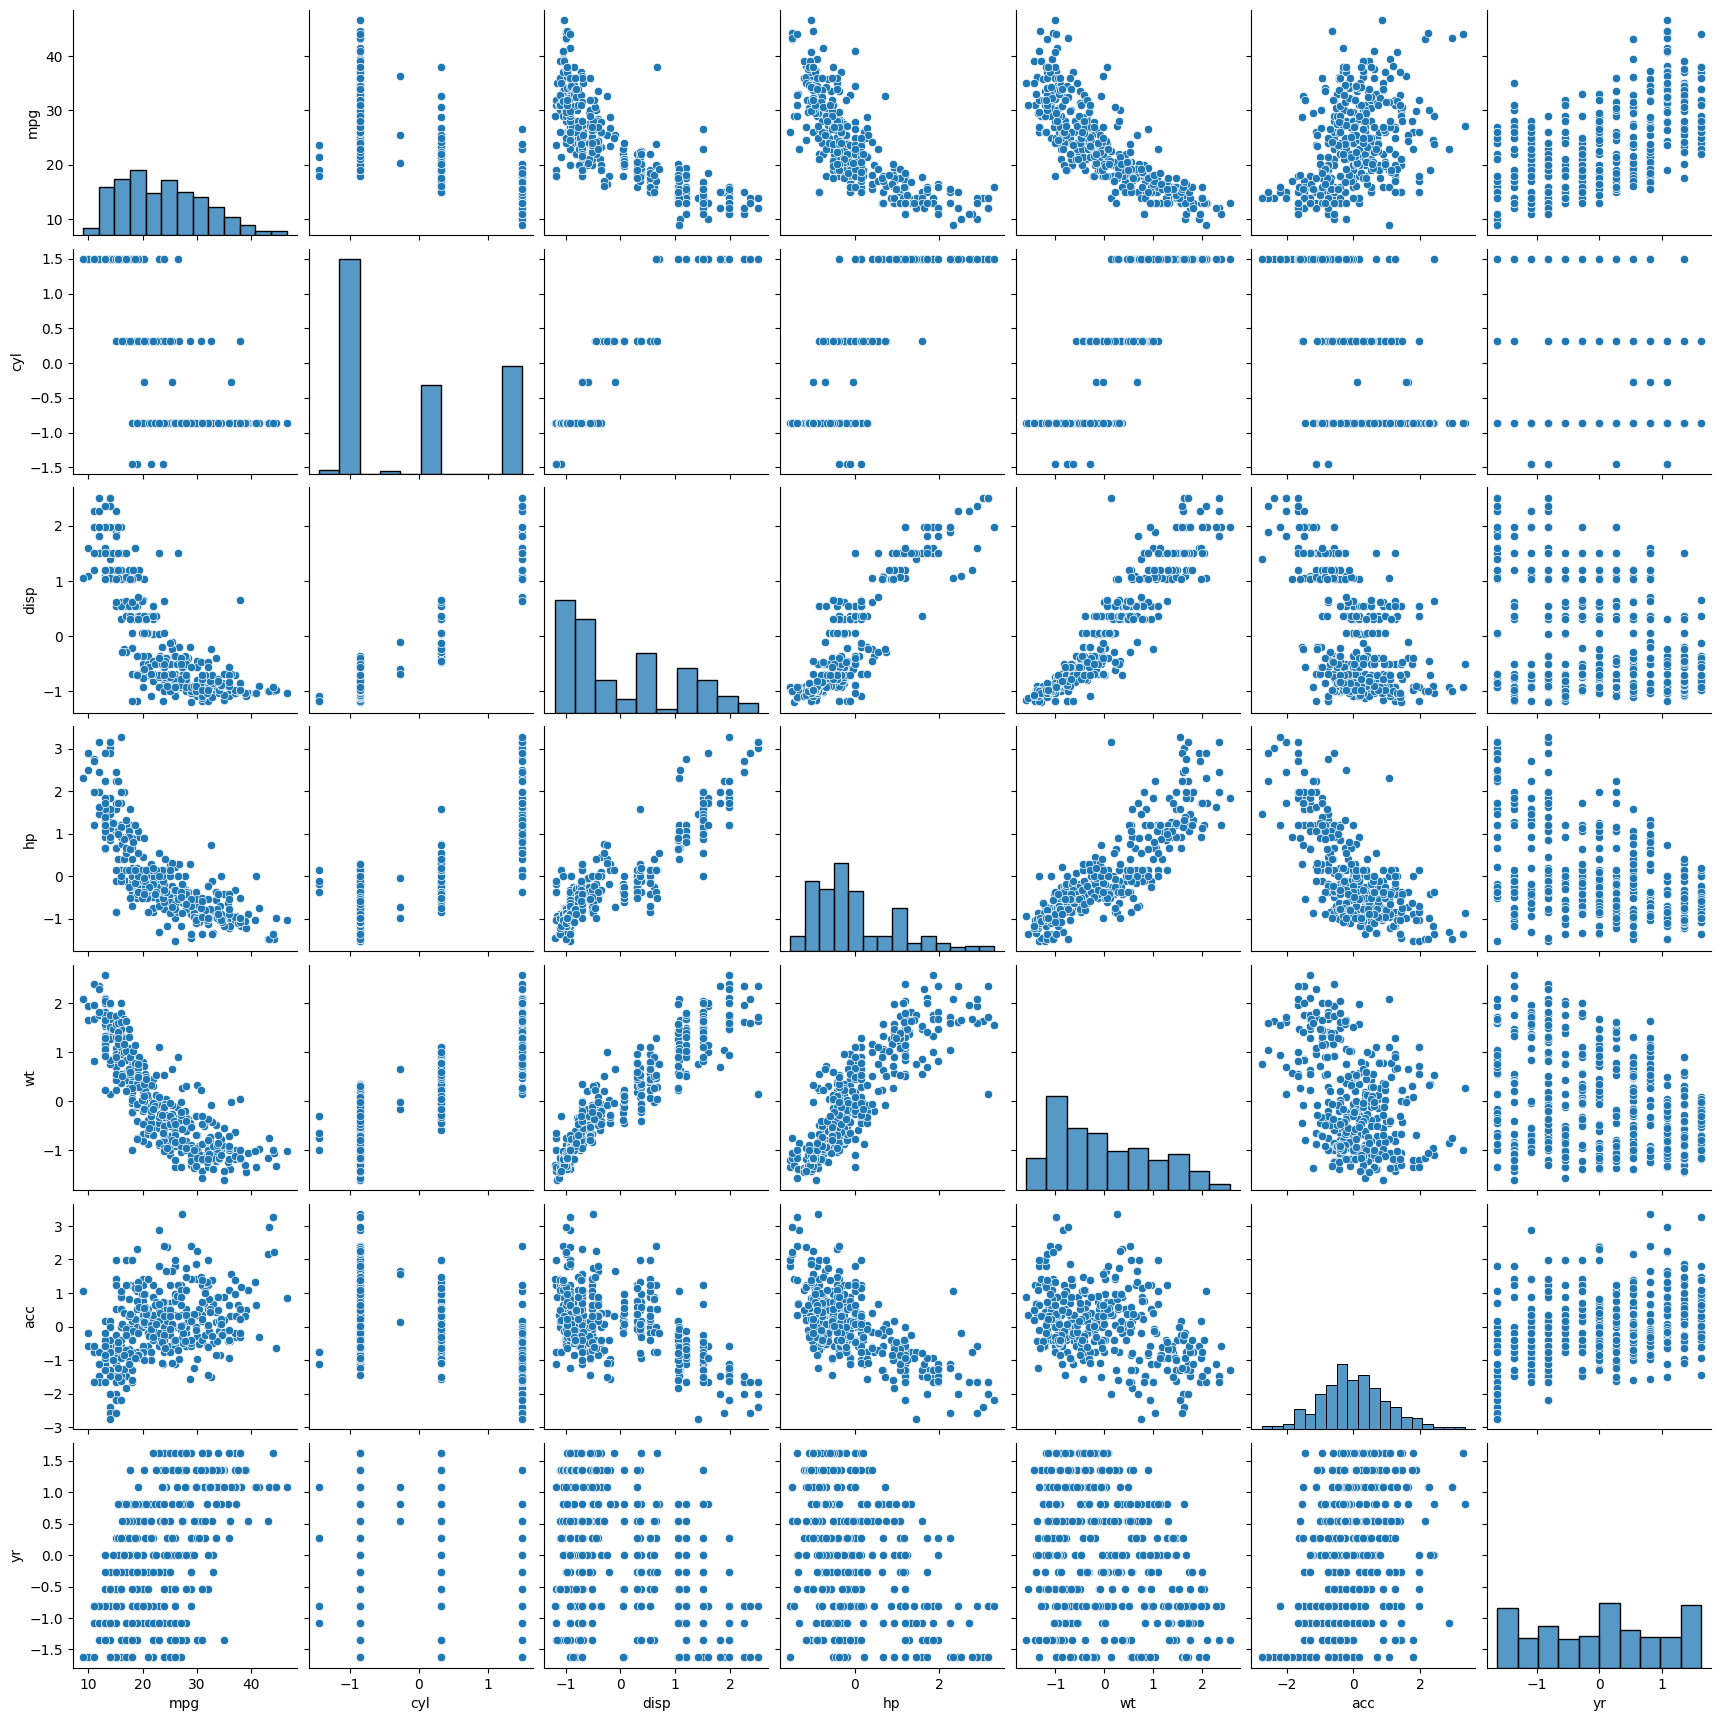

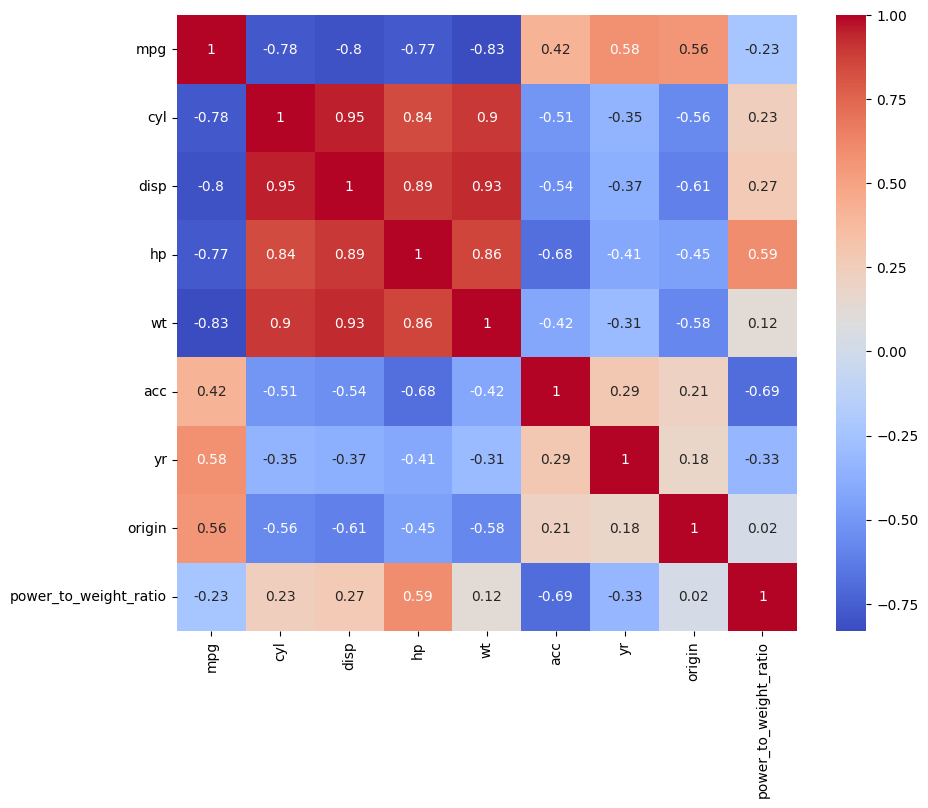

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plot
sns.pairplot(data[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr']])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


**clustring (unsupervised learning)**
apply k means

c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


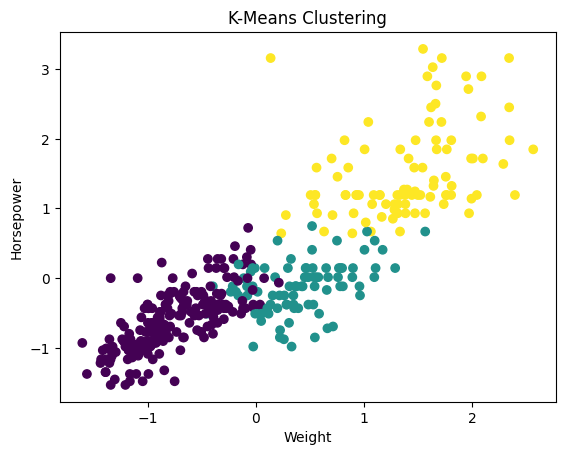

In [21]:
from sklearn.cluster import KMeans

# Apply K-Means 
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize clusters
plt.scatter(data['wt'], data['hp'], c=data['cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('K-Means Clustering')
plt.show()


**supervised learning**
build and evaluate regression models 

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    X = cluster_data[features]
    y = cluster_data['mpg']
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f"Cluster {cluster} RMSE: {rmse}")


Cluster 2 RMSE: 1.418425327894475
Cluster 0 RMSE: 3.1860618279452324
Cluster 1 RMSE: 2.81999712832731


**model reporting**
analyze and report results.


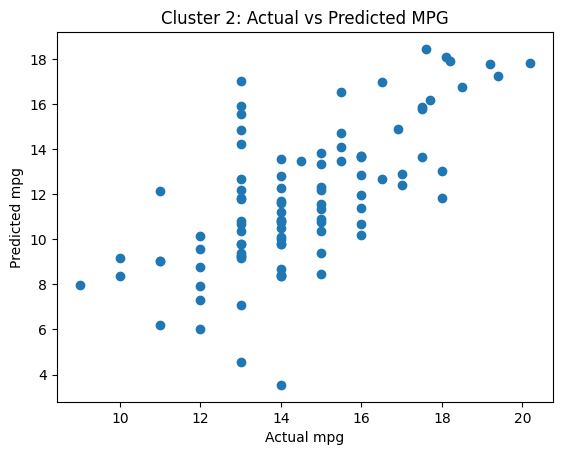

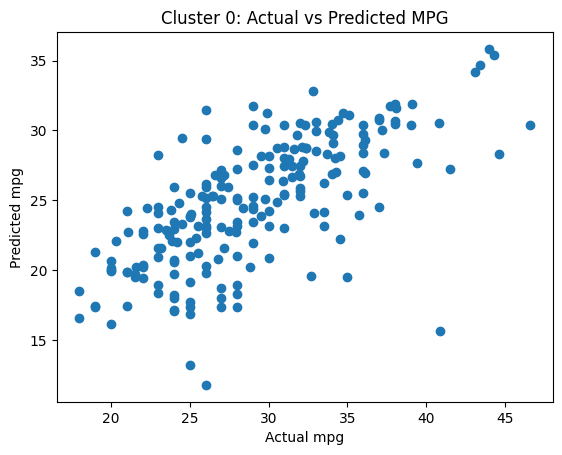

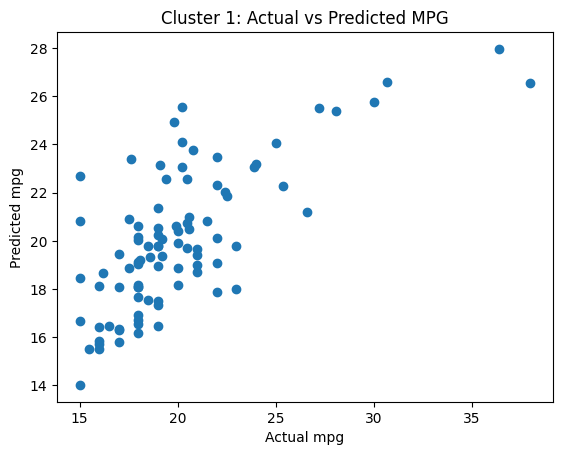

In [23]:
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    
    X = cluster_data[features]
    y = cluster_data['mpg']
    y_pred = model.predict(X)
    
    plt.scatter(y, y_pred)
    plt.xlabel('Actual mpg')
    plt.ylabel('Predicted mpg')
    plt.title(f'Cluster {cluster}: Actual vs Predicted MPG')
    plt.show()
